🚀 Starting Cloud Cost Optimizer...
💰 Analyzing cloud costs...
📊 Generating dashboard...
✅ Dashboard saved as 'cost_optimization_dashboard.png'


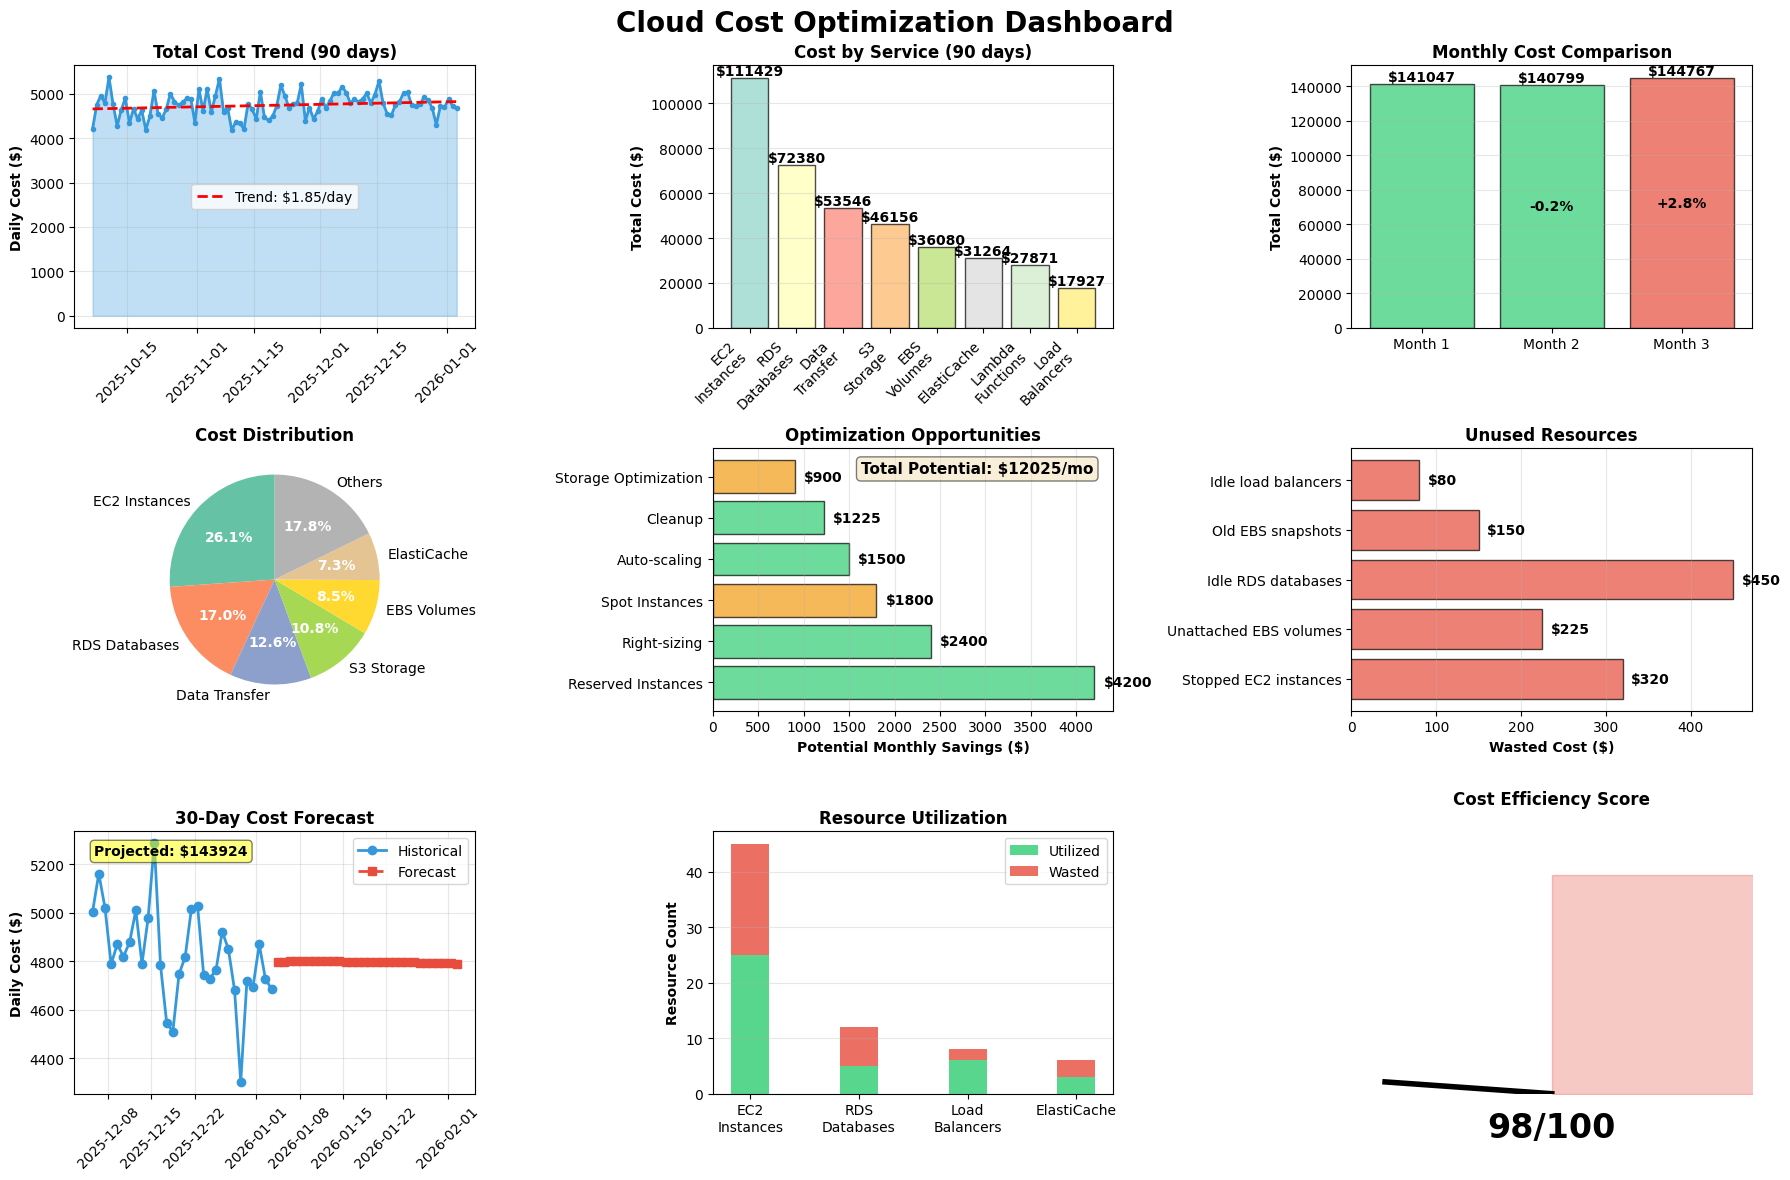


                      CLOUD COST OPTIMIZATION REPORT

💰 Total Cost (90 days): $426,613.09
📊 Monthly Average: $142,204.36
🗑️  Monthly Waste: $1225.00
💡 Total Potential Savings: $12025.00/month

🎯 Top Recommendations:
   1. Purchase RIs for stable workloads
      Savings: $4200/mo | Priority: High | Effort: Low
   2. Downsize 12 underutilized EC2 instances
      Savings: $2400/mo | Priority: High | Effort: Low
   3. Migrate dev/test to Spot
      Savings: $1800/mo | Priority: Medium | Effort: Medium

📈 Potential ROI: 8.5% cost reduction


✅ Cost analysis complete!


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import random
from collections import defaultdict

class CostOptimizer:
    def __init__(self):
        self.cost_data = defaultdict(list)
        self.recommendations = []
        self.resource_inventory = {}
        self.unused_resources = []

    def simulate_cloud_costs(self, days=90):
        """Simulate multi-cloud cost data"""
        services = {
            'EC2_Instances': {'base_cost': 1200, 'variance': 300, 'trend': 1.02},
            'RDS_Databases': {'base_cost': 800, 'variance': 150, 'trend': 1.01},
            'S3_Storage': {'base_cost': 500, 'variance': 100, 'trend': 1.015},
            'Lambda_Functions': {'base_cost': 300, 'variance': 80, 'trend': 1.03},
            'EBS_Volumes': {'base_cost': 400, 'variance': 50, 'trend': 1.0},
            'Data_Transfer': {'base_cost': 600, 'variance': 200, 'trend': 1.0},
            'Load_Balancers': {'base_cost': 200, 'variance': 30, 'trend': 1.0},
            'CloudWatch': {'base_cost': 150, 'variance': 40, 'trend': 1.02},
            'VPC_NAT': {'base_cost': 180, 'variance': 20, 'trend': 1.0},
            'ElastiCache': {'base_cost': 350, 'variance': 70, 'trend': 1.01}
        }

        start_date = datetime.now() - timedelta(days=days)

        for day in range(days):
            date = start_date + timedelta(days=day)

            for service, config in services.items():
                # Apply trend over time
                trend_factor = config['trend'] ** (day / 30)
                base = config['base_cost'] * trend_factor

                # Add variance and seasonality
                seasonal = 1 + 0.2 * np.sin(2 * np.pi * day / 30)
                daily_cost = base + random.uniform(-config['variance'],
                                                   config['variance']) * seasonal
                daily_cost = max(0, daily_cost)

                self.cost_data[service].append({
                    'date': date,
                    'cost': daily_cost,
                    'service': service
                })

        # Generate resource inventory
        self.generate_resource_inventory()

        # Identify unused resources
        self.identify_unused_resources()

        # Generate optimization recommendations
        self.generate_recommendations()

    def generate_resource_inventory(self):
        """Generate inventory of cloud resources"""
        self.resource_inventory = {
            'EC2_Instances': {
                'running': 45,
                'stopped': 8,
                'underutilized': 12,
                'overprovisioned': 6
            },
            'RDS_Databases': {
                'active': 12,
                'idle': 3,
                'underutilized': 4
            },
            'EBS_Volumes': {
                'attached': 60,
                'unattached': 15,
                'snapshots': 120
            },
            'Load_Balancers': {
                'active': 8,
                'idle': 2
            },
            'ElastiCache': {
                'active': 6,
                'underutilized': 3
            }
        }

    def identify_unused_resources(self):
        """Identify unused and wasted resources"""
        self.unused_resources = [
            {
                'resource': 'Stopped EC2 instances',
                'count': 8,
                'monthly_cost': 320,
                'recommendation': 'Terminate or hibernate'
            },
            {
                'resource': 'Unattached EBS volumes',
                'count': 15,
                'monthly_cost': 225,
                'recommendation': 'Delete unused volumes'
            },
            {
                'resource': 'Idle RDS databases',
                'count': 3,
                'monthly_cost': 450,
                'recommendation': 'Stop or downsize'
            },
            {
                'resource': 'Old EBS snapshots',
                'count': 50,
                'monthly_cost': 150,
                'recommendation': 'Implement lifecycle policy'
            },
            {
                'resource': 'Idle load balancers',
                'count': 2,
                'monthly_cost': 80,
                'recommendation': 'Remove unused LBs'
            }
        ]

    def generate_recommendations(self):
        """Generate cost optimization recommendations"""
        self.recommendations = [
            {
                'category': 'Right-sizing',
                'description': 'Downsize 12 underutilized EC2 instances',
                'potential_savings': 2400,
                'effort': 'Low',
                'priority': 'High'
            },
            {
                'category': 'Reserved Instances',
                'description': 'Purchase RIs for stable workloads',
                'potential_savings': 4200,
                'effort': 'Low',
                'priority': 'High'
            },
            {
                'category': 'Spot Instances',
                'description': 'Migrate dev/test to Spot',
                'potential_savings': 1800,
                'effort': 'Medium',
                'priority': 'Medium'
            },
            {
                'category': 'Storage Optimization',
                'description': 'Move infrequent data to S3 Glacier',
                'potential_savings': 900,
                'effort': 'Medium',
                'priority': 'Medium'
            },
            {
                'category': 'Auto-scaling',
                'description': 'Implement auto-scaling groups',
                'potential_savings': 1500,
                'effort': 'High',
                'priority': 'High'
            },
            {
                'category': 'Cleanup',
                'description': 'Remove unused resources',
                'potential_savings': 1225,
                'effort': 'Low',
                'priority': 'High'
            }
        ]

    def generate_dashboard(self):
        """Generate comprehensive cost optimization dashboard"""
        fig = plt.figure(figsize=(18, 12))
        fig.suptitle('Cloud Cost Optimization Dashboard',
                     fontsize=20, fontweight='bold')

        # 1. Total Cost Trend
        ax1 = plt.subplot(3, 3, 1)
        all_dates = sorted(set(d['date'] for service_data in self.cost_data.values()
                              for d in service_data))

        daily_totals = []
        for date in all_dates:
            day_total = sum(d['cost'] for service_data in self.cost_data.values()
                           for d in service_data if d['date'] == date)
            daily_totals.append(day_total)

        ax1.plot(all_dates, daily_totals, linewidth=2, color='#3498db', marker='o',
                markersize=3)
        ax1.fill_between(all_dates, daily_totals, alpha=0.3, color='#3498db')

        # Add trend line
        x = np.arange(len(daily_totals))
        z = np.polyfit(x, daily_totals, 1)
        p = np.poly1d(z)
        ax1.plot(all_dates, p(x), "--", color='red', linewidth=2,
                label=f'Trend: ${z[0]:.2f}/day')

        ax1.set_ylabel('Daily Cost ($)', fontweight='bold')
        ax1.set_title('Total Cost Trend (90 days)', fontweight='bold')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

        # 2. Cost by Service
        ax2 = plt.subplot(3, 3, 2)
        service_totals = {}
        for service, data in self.cost_data.items():
            service_totals[service] = sum(d['cost'] for d in data)

        sorted_services = sorted(service_totals.items(), key=lambda x: x[1], reverse=True)
        services = [s[0].replace('_', '\n') for s in sorted_services[:8]]
        costs = [s[1] for s in sorted_services[:8]]

        colors = plt.cm.Set3(np.linspace(0, 1, len(services)))
        bars = ax2.bar(services, costs, color=colors, alpha=0.7, edgecolor='black')
        ax2.set_ylabel('Total Cost ($)', fontweight='bold')
        ax2.set_title('Cost by Service (90 days)', fontweight='bold')
        ax2.grid(axis='y', alpha=0.3)
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:.0f}', ha='center', va='bottom', fontweight='bold')

        # 3. Monthly Cost Comparison
        ax3 = plt.subplot(3, 3, 3)
        months = ['Month 1', 'Month 2', 'Month 3']
        month_costs = []

        days_per_month = len(daily_totals) // 3
        for i in range(3):
            start_idx = i * days_per_month
            end_idx = (i + 1) * days_per_month if i < 2 else len(daily_totals)
            month_cost = sum(daily_totals[start_idx:end_idx])
            month_costs.append(month_cost)

        colors_month = ['#e74c3c' if i > 0 and month_costs[i] > month_costs[i-1]
                       else '#2ecc71' for i in range(3)]
        bars = ax3.bar(months, month_costs, color=colors_month, alpha=0.7, edgecolor='black')
        ax3.set_ylabel('Total Cost ($)', fontweight='bold')
        ax3.set_title('Monthly Cost Comparison', fontweight='bold')
        ax3.grid(axis='y', alpha=0.3)

        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:.0f}', ha='center', va='bottom', fontweight='bold')
            if i > 0:
                change = ((month_costs[i] - month_costs[i-1]) / month_costs[i-1]) * 100
                ax3.text(bar.get_x() + bar.get_width()/2., height * 0.5,
                        f'{change:+.1f}%', ha='center', va='center',
                        fontweight='bold', fontsize=10)

        # 4. Cost Distribution Pie Chart
        ax4 = plt.subplot(3, 3, 4)
        top_services = sorted_services[:6]
        other_cost = sum(s[1] for s in sorted_services[6:])

        pie_labels = [s[0].replace('_', ' ') for s in top_services] + ['Others']
        pie_costs = [s[1] for s in top_services] + [other_cost]

        colors_pie = plt.cm.Set2(np.linspace(0, 1, len(pie_labels)))
        wedges, texts, autotexts = ax4.pie(pie_costs, labels=pie_labels, autopct='%1.1f%%',
                                            colors=colors_pie, startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        ax4.set_title('Cost Distribution', fontweight='bold')

        # 5. Potential Savings
        ax5 = plt.subplot(3, 3, 5)
        recommendations_sorted = sorted(self.recommendations,
                                      key=lambda x: x['potential_savings'], reverse=True)

        rec_labels = [r['category'] for r in recommendations_sorted]
        rec_savings = [r['potential_savings'] for r in recommendations_sorted]
        rec_colors = ['#2ecc71' if r['priority'] == 'High' else '#f39c12'
                     for r in recommendations_sorted]

        bars = ax5.barh(rec_labels, rec_savings, color=rec_colors, alpha=0.7,
                       edgecolor='black')
        ax5.set_xlabel('Potential Monthly Savings ($)', fontweight='bold')
        ax5.set_title('Optimization Opportunities', fontweight='bold')
        ax5.grid(axis='x', alpha=0.3)

        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax5.text(width + 100, bar.get_y() + bar.get_height()/2,
                    f'${width:.0f}', ha='left', va='center', fontweight='bold')

        total_potential = sum(rec_savings)
        ax5.text(0.95, 0.95, f'Total Potential: ${total_potential:.0f}/mo',
                transform=ax5.transAxes, ha='right', va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=11, fontweight='bold')

        # 6. Unused Resources
        ax6 = plt.subplot(3, 3, 6)
        unused_labels = [r['resource'] for r in self.unused_resources]
        unused_costs = [r['monthly_cost'] for r in self.unused_resources]

        bars = ax6.barh(unused_labels, unused_costs, color='#e74c3c',
                       alpha=0.7, edgecolor='black')
        ax6.set_xlabel('Wasted Cost ($)', fontweight='bold')
        ax6.set_title('Unused Resources', fontweight='bold')
        ax6.grid(axis='x', alpha=0.3)

        for i, bar in enumerate(bars):
            width = bar.get_width()
            ax6.text(width + 10, bar.get_y() + bar.get_height()/2,
                    f'${width:.0f}', ha='left', va='center', fontweight='bold')

        # 7. Cost Forecast
        ax7 = plt.subplot(3, 3, 7)
        # Forecast next 30 days
        x_hist = np.arange(len(daily_totals))
        z = np.polyfit(x_hist, daily_totals, 2)
        p = np.poly1d(z)

        forecast_days = 30
        x_future = np.arange(len(daily_totals), len(daily_totals) + forecast_days)
        forecast = p(x_future)

        future_dates = [all_dates[-1] + timedelta(days=i+1) for i in range(forecast_days)]

        ax7.plot(all_dates[-30:], daily_totals[-30:], 'o-',
                label='Historical', linewidth=2, color='#3498db')
        ax7.plot(future_dates, forecast, 's--',
                label='Forecast', linewidth=2, color='#e74c3c')
        ax7.set_ylabel('Daily Cost ($)', fontweight='bold')
        ax7.set_title('30-Day Cost Forecast', fontweight='bold')
        ax7.legend()
        ax7.grid(True, alpha=0.3)
        plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45)

        # Add projected monthly cost
        projected_monthly = sum(forecast)
        ax7.text(0.05, 0.95, f'Projected: ${projected_monthly:.0f}',
                transform=ax7.transAxes, ha='left', va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
                fontsize=10, fontweight='bold')

        # 8. Resource Utilization
        ax8 = plt.subplot(3, 3, 8)
        categories = []
        utilized = []
        wasted = []

        for resource, stats in self.resource_inventory.items():
            if 'underutilized' in stats or 'idle' in stats or 'stopped' in stats:
                categories.append(resource.replace('_', '\n'))

                total = sum(v for k, v in stats.items()
                           if k in ['running', 'active', 'attached'])
                waste = sum(v for k, v in stats.items()
                           if k in ['underutilized', 'idle', 'stopped', 'unattached'])

                utilized.append(total - waste)
                wasted.append(waste)

        x = np.arange(len(categories))
        width = 0.35

        ax8.bar(x, utilized, width, label='Utilized', color='#2ecc71', alpha=0.8)
        ax8.bar(x, wasted, width, bottom=utilized, label='Wasted',
               color='#e74c3c', alpha=0.8)

        ax8.set_ylabel('Resource Count', fontweight='bold')
        ax8.set_title('Resource Utilization', fontweight='bold')
        ax8.set_xticks(x)
        ax8.set_xticklabels(categories)
        ax8.legend()
        ax8.grid(axis='y', alpha=0.3)

        # 9. Cost Efficiency Score
        ax9 = plt.subplot(3, 3, 9)

        # Calculate efficiency metrics
        total_cost = sum(service_totals.values())
        total_waste = sum(r['monthly_cost'] for r in self.unused_resources)
        waste_percentage = (total_waste / (total_cost / 3)) * 100  # Monthly waste

        efficiency_score = max(0, 100 - waste_percentage * 2)

        # Create gauge chart
        colors_gauge = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71']
        bounds = [0, 50, 70, 85, 100]

        # Draw gauge background
        for i in range(len(colors_gauge)):
            theta = np.linspace(np.pi * (bounds[i]/100),
                              np.pi * (bounds[i+1]/100), 100)
            r = np.ones_like(theta)
            ax9.fill_between(theta, 0, r, color=colors_gauge[i], alpha=0.3)

        # Draw score needle
        angle = np.pi * (efficiency_score / 100)
        ax9.plot([0, np.cos(angle)], [0, np.sin(angle)],
                color='black', linewidth=4)

        ax9.set_xlim(-1.2, 1.2)
        ax9.set_ylim(0, 1.2)
        ax9.axis('off')
        ax9.set_title('Cost Efficiency Score', fontweight='bold', pad=20)
        ax9.text(0, -0.2, f'{efficiency_score:.0f}/100', ha='center',
                fontsize=24, fontweight='bold')

        plt.tight_layout()
        plt.savefig('cost_optimization_dashboard.png', dpi=300, bbox_inches='tight')
        print("✅ Dashboard saved as 'cost_optimization_dashboard.png'")
        plt.show()

    def generate_report(self):
        """Generate text report"""
        print("\n" + "="*80)
        print(" "*22 + "CLOUD COST OPTIMIZATION REPORT")
        print("="*80 + "\n")

        total_cost = sum(sum(d['cost'] for d in data)
                        for data in self.cost_data.values())
        monthly_avg = total_cost / 3

        print(f"💰 Total Cost (90 days): ${total_cost:,.2f}")
        print(f"📊 Monthly Average: ${monthly_avg:,.2f}")

        total_waste = sum(r['monthly_cost'] for r in self.unused_resources)
        print(f"🗑️  Monthly Waste: ${total_waste:.2f}")

        total_potential = sum(r['potential_savings']
                             for r in self.recommendations)
        print(f"💡 Total Potential Savings: ${total_potential:.2f}/month")

        print(f"\n🎯 Top Recommendations:")
        for i, rec in enumerate(sorted(self.recommendations,
                                      key=lambda x: x['potential_savings'],
                                      reverse=True)[:3], 1):
            print(f"   {i}. {rec['description']}")
            print(f"      Savings: ${rec['potential_savings']}/mo | "
                  f"Priority: {rec['priority']} | Effort: {rec['effort']}")

        roi = (total_potential / monthly_avg) * 100
        print(f"\n📈 Potential ROI: {roi:.1f}% cost reduction")

        print("\n" + "="*80 + "\n")

# Main execution
if __name__ == "__main__":
    print("🚀 Starting Cloud Cost Optimizer...")

    optimizer = CostOptimizer()
    print("💰 Analyzing cloud costs...")
    optimizer.simulate_cloud_costs(days=90)

    print("📊 Generating dashboard...")
    optimizer.generate_dashboard()

    optimizer.generate_report()

    print("✅ Cost analysis complete!")